In [1]:
import pandas as pd
import numpy as np
import sys
from datetime import datetime
import time
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from math import log
from collections import Counter
import re
import os, sys, email,re
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
# Network analysis
import networkx as nx
# NLP
from nltk.tokenize.regexp import RegexpTokenizer
from subprocess import check_output
# Network analysis
import networkx as nx
# NLP
from nltk.tokenize.regexp import RegexpTokenizer
from subprocess import check_output
import os, sys, email,re
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set_style('whitegrid')
#import wordcloud
import networkx as nx
from nltk.tokenize.regexp import RegexpTokenizer
from subprocess import check_output
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.stem.porter import PorterStemmer
%matplotlib inline
%pylab inline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.lda import LDA
from sklearn.decomposition import LatentDirichletAllocation
import random
import email
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics 
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import coo_matrix, hstack
import glmnet_python
from glmnet import glmnet
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn import linear_model

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Populating the interactive namespace from numpy and matplotlib


C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module 

In [32]:
emails_df = pd.read_csv('emails_dataset_2000.csv')
#emails_df = emails_df.drop('Unnamed: 0', axis = 1)
emails_df['Date'] = pd.to_datetime(emails_df['Date'])
emails_df['To'] = emails_df['To'].apply(lambda x: frozenset(x[1:-1].split(',')))
emails_df['From'] = emails_df['From'].apply(lambda x: frozenset(x[1:-1].split(',')))
emails_df.head()

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread
0,2000-01-01 14:36:00,"(rozenset({""'sally.beck@enron.com'""})","(rozenset({""'fernley.dyson@enron.com'""})",happy new year - no y2k fear!,We are wrapping up several hours in the office...,946726560.0,2000,wrapping several hour office tested commodity ...,0.406400,0,31817
1,2000-01-01 19:17:00,"(rozenset({""'lenos@ucy.ac.cy'""})","(rozenset({""'gordon.sick@rogroup.com'""})",program attached; march ny ro conference/parti...,The current version of the conference program ...,946743420.0,2000,current version conference program attached pl...,0.186760,1,196
2,2000-01-02 13:12:00,"(rozenset({""'andrew.parsons@enron.com'""})","( "" 'kelly.kimberly@enron.com'"", "" 'mike.mcco...",summary of y2k glitches,Following please find a summary of the minor Y...,946807920.0,2000,following please find summary minor related gl...,0.950536,2,2276
3,2000-01-03 06:17:00,"(rozenset({""'emoler@velaw.com'""})","(rozenset({""'steven.kean@enron.com'"", "" 'cynt...",options memo,Here's the options memo you requested. Happy ...,946869420.0,2000,option memo requested happy new year betsy doc...,0.000000,3,14978
4,2000-01-03 08:20:00,"(rozenset({""'steven.kean@enron.com'""})","(rozenset({""'maureen.mcvicker@enron.com'""})",additions to working groups,yes -- just make sure the working group lead...,946876800.0,2000,yes make sure working group leader know mauree...,-0.324299,4,47838


In [33]:
def count_threads(n):
    df_threads = emails_df[emails_df['Number_of_thread'] == n]
    return len(df_threads)
    
emails_df['count_threads'] = emails_df['Number_of_thread'].apply(lambda x: count_threads(x))
df_threads = emails_df[(emails_df['count_threads'] > 1) & (emails_df['Number_of_thread'] != 0)]

In [34]:
def answer_not(From):
    if len(set(From)) == 1:
        return 0
    else:
        return 1
dict_threads_answer = {}    
for n in list(set(df_threads.Number_of_thread)):
    if n == 0:
        continue
    df = df_threads[df_threads.Number_of_thread == n]
    dict_threads_answer[n] = answer_not(list(df['From']))

df_threads['answer'] = df_threads['Number_of_thread'].apply(lambda x: dict_threads_answer[x])
df_threads = df_threads[df_threads['answer'] == 1]
df_threads = df_threads.dropna()

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [35]:
dict_tail = {}
for n in df_threads.Number_of_thread:
    df = df_threads[df_threads.Number_of_thread == n]
    for l, ind in zip(reversed(range(len(df))), df.Index.values):
        dict_tail[ind] = l
df_threads['tail'] = df_threads['Index'].apply(lambda x: dict_tail[x])        

In [6]:
df_threads

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,count_threads,answer,tail
42,2000-01-04 12:11:00,"(rozenset({""'vince.kaminski@enron.com'""})","(rozenset({""'candace.womack@enron.com'""})",vincent tang,"Candace, \r\n\r\nSorry for the delay. I shall...",946977060.0,2000,candace sorry delay shall edit job description...,-0.262887,42,25014,3,1,2
73,2000-01-04 16:51:00,"(rozenset({""'donald.reinhardt@enron.com'""})","(rozenset({""'daren.farmer@enron.com'""})","c&e operating, 11/99 production",Set out below is information regarding 660 MMB...,946993860.0,2000,set information regarding mmbtu produced novem...,-0.464534,73,15916,2,1,1
137,2000-01-05 13:46:00,"(rozenset({""'elizabeth.sager@enron.com'""})","(rozenset({""'gacox@gsi-net.com'""})",tennis,On?\r\n\r\nName the time (400?) and the spot (...,947069160.0,2000,name time spot met,0.000000,137,9372,2,1,1
171,2000-01-05 19:05:00,"(rozenset({""'gacox@gsi-net.com'""})","(rozenset({""'elizabeth.sager@enron.com'""})",tennis,>On? okey-dokey\r\n>\r\n>Name the time (400?)...,947088300.0,2000,okey dokey name time spot met met palm reserve...,0.693419,171,9372,2,1,0
199,2000-01-06 10:13:00,"(rozenset({""'benjamin.rogers@enron.com'""})","(rozenset({""'thz@compuserve.com'""})",email,Here is the presentation Don and I have been w...,947142780.0,2000,presentation working copy linda miller please ...,0.831775,199,9775,2,1,1
230,2000-01-06 14:48:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'tobin.carlson@enron.com'""})",limits,How goes figuring out why our positions were s...,947159280.0,2000,go figuring position far,0.000000,230,39411,7,1,6
231,2000-01-06 15:00:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'tobin.carlson@enron.com'""})",limits,I don't know what you mean about the positions...,947160000.0,2000,know mean position defunct,0.000000,231,39411,7,1,5
239,2000-01-06 15:30:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'tobin.carlson@enron.com'""})",limits,We have no idea! We rely on you to tell us wh...,947161800.0,2000,idea rely tell position,0.000000,239,39411,7,1,4
242,2000-01-06 15:48:00,"(rozenset({""'thz@compuserve.com'""})","(rozenset({""'benjamin.rogers@enron.com'""})",email,Ben:\r\n\r\nI received your message and look f...,947162880.0,2000,ben received message look forward seeing prese...,-0.357059,242,9775,2,1,0
243,2000-01-06 15:51:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'tobin.carlson@enron.com'""})",limits,Without calling each of the respective traders...,947163060.0,2000,without calling respective trader know position,0.000000,243,39411,7,1,3


#### TFidf

In [13]:
data_train, data_test, y_train, y_test = train_test_split(df_threads['clean_content'].values, 
                                                          df_threads['tail'].values, test_size=0.25)
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
X_train = vect.fit_transform(data_train)
X_test = vect.transform(data_test)
feature = vect.get_feature_names()

Ridge

In [120]:
from sklearn import linear_model

reg = linear_model.Ridge (alpha = 0.9)
y_reg = reg.fit(X_train, y_train).predict(X_test)
coef = reg.coef_
print(a, mean_squared_error(y_test, y_reg))

1.9 2.20347224858


Regression models

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor

pca = PCA(n_components=1000)
X_train_pca = pca.fit_transform(X_train)

In [ ]:
for model in [GradientBoostingRegressor, RandomForestRegressor, BayesianRidge, SGDRegressor]:
    print(model, cross_val_score(model(), X_train_pca, y_train, cv=4).mean())

Исследование коэффициентов

In [80]:
df = pd.DataFrame()
df['featurs'] = list(feature)
df['coef'] = list(coef)
df = df.sort_values(by = 'coef', ascending=False)
df

,featurs,coef
4188,court,13.730163
4734,dede,12.892084
852,apb,12.285799
2163,bout,12.258587
21237,yuk,11.768886
14159,peak,10.405084
19251,tino,9.849839
5428,doe,9.727593
10759,langley,9.180795
1406,babysitting,9.119905


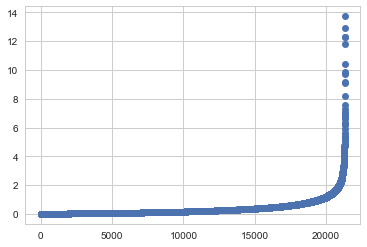

In [91]:
plt.plot(range(len(df)), sort(df['coef'].map(abs)), 'o')
plt.show()

In [95]:
df['abs_coef'] = df['coef'].apply(lambda x: abs(x))

In [98]:
df[(df['abs_coef'] > 0) & (df['abs_coef'] < 0.1)]

,featurs,coef,abs_coef
4820,delegation,0.099932,0.099932
7620,gaming,0.099878,0.099878
20501,wagner,0.099845,0.099845
19590,trick,0.099726,0.099726
18449,suburban,0.099726,0.099726
4461,cybergoblins,0.099726,0.099726
18994,tent,0.099664,0.099664
893,applcation,0.099566,0.099566
6957,feedstock,0.099549,0.099549
1231,attn,0.099532,0.099532


#### Исследование зависимости текста и объема сообщения

In [36]:
df_threads['volum_message'] = df_threads['clean_content'].apply(lambda x: len(x))

In [8]:
df_threads = df_threads[df_threads['volum_message'] < 50000]

In [37]:
len(df_threads)

7818

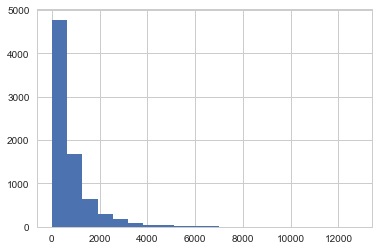

In [18]:
plt.hist(df_threads['volum_message'], bins = 20)
plt.show()

130.57297728


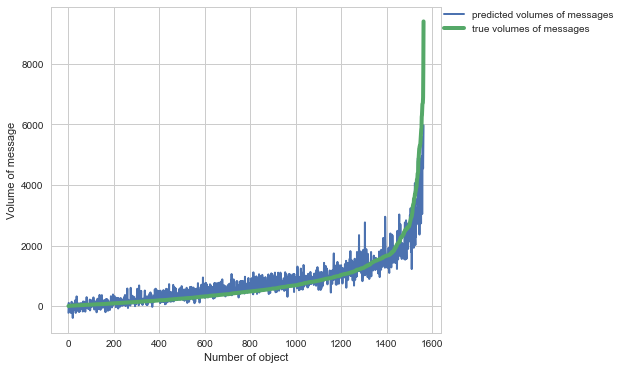

In [16]:
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True, ngram_range=(1, 2))

X = vect.fit_transform(df_threads['clean_content'].values)
y = df_threads['volum_message'].values

data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = data_train
X_test = data_test
feature = vect.get_feature_names()

reg = linear_model.Ridge(alpha=1, tol = 0.001)
y_reg = reg.fit(X_train, y_train).predict(X_test)
coef = reg.coef_
print(metrics.median_absolute_error(y_test, y_reg))

figure(figsize=(7, 6))
df_score = pd.DataFrame()
df_score['y_test'] = y_test
df_score['y_pred'] = y_reg
df_score = df_score.sort_values(by = 'y_test')
plt.plot(range(len(df_score)), df_score['y_pred'], '-', linewidth=2.0, label = 'predicted volumes of messages')
plt.plot(range(len(df_score)), df_score['y_test'], '-', linewidth=4.0, label = 'true volumes of messages')
plt.xlabel('Number of object')
plt.ylabel('Volume of message')
plt.legend(bbox_to_anchor=(1.45, 1.), loc=0, ncol=1, borderaxespad=0.)

In [21]:
coef[0]

31.164035533832774

In [22]:
df_save1 = pd.DataFrame()
df_save1['featurs'] = list(feature)
df_save1['coef'] = list(coef)
df_save1 = df_save1.sort_values(by = 'coef', ascending=False)
df_save1

,featurs,coef
146188,market,1748.245583
29053,business,1498.002665
226398,state,1412.905133
8082,also,1225.591522
40342,com,1215.826110
84624,even,1183.071662
123392,issue,1146.351284
117561,including,1112.895143
189648,provide,1110.328268
261845,within,1070.836319


In [23]:
df_save1.to_csv('df_save1_volem.csv', index = False)

In [11]:
def to_norm(data):
    data = data
    res = stats.boxcox(data)
    lambda_ = res[1]
    data_norm = res[0]
    return (data_norm, lambda_)

In [12]:
df_threads['volum_massage_norm'] =  to_norm(df_threads['volum_message'])[0]

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
to_norm(df_threads['volum_message'])[1]

0.14811227716285089

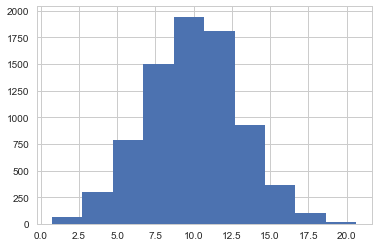

In [29]:
plt.hist(df_threads['volum_massage_norm'])
plt.show()

In [96]:
data_train, data_test, y_train, y_test = train_test_split(df_threads['clean_content'].values, 
                                                          df_threads['volum_massage_norm'].values, test_size=0.2)
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True, ngram_range=(1, 1))
X_train = vect.fit_transform(data_train)
X_test = vect.transform(data_test)
feature = vect.get_feature_names()

0.637022255352


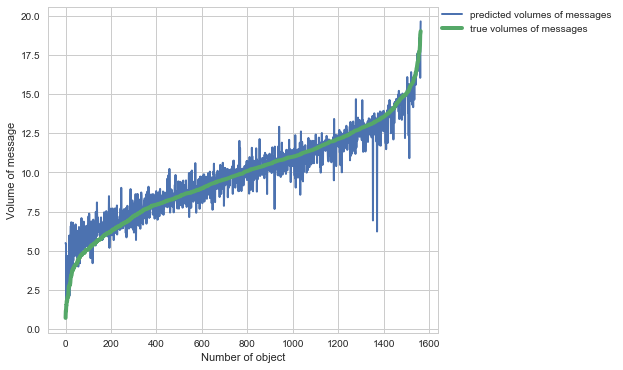

In [30]:
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True, ngram_range=(1, 2))

X = vect.fit_transform(df_threads['clean_content'].values)
y = df_threads['volum_massage_norm'].values
X = X.toarray()

data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = data_train
X_test = data_test
feature = vect.get_feature_names()

reg = linear_model.Ridge(alpha=0.001, tol = 0.000001)
y_reg = reg.fit(X_train, y_train).predict(X_test)
coef = reg.coef_
print(mean_squared_error(y_test, y_reg))

figure(figsize=(7, 6))
df_score = pd.DataFrame()
df_score['y_test'] = y_test 
df_score['y_pred'] = y_reg
df_score = df_score.sort_values(by = 'y_test')
plt.plot(range(len(df_score)), df_score['y_pred'], '-', linewidth=2.0, label = 'predicted volumes of messages')
plt.plot(range(len(df_score)), df_score['y_test'], '-', linewidth=4.0, label = 'true volumes of messages')
plt.xlabel('Number of object')
plt.ylabel('Volume of message')
plt.legend(bbox_to_anchor=(1., 1.), loc=0, ncol=1, borderaxespad=0.)

In [31]:
len(df_threads)

7817

In [27]:
df_save2 = pd.DataFrame()
df_save2['featurs'] = list(feature)
df_save2['coef'] = list(coef)
df_save2 = df_save2.sort_values(by = 'coef', ascending=False)
df_save2

,featurs,coef
96621,forwarded,6.997361
40342,com,6.946395
8082,also,5.887186
80264,enron enron,5.547499
263863,would,5.473487
73509,ect ect,5.358291
167759,one,5.061596
148020,may,4.440978
241307,time,4.401870
211139,scheduled attend,4.270511


In [28]:
df_save2.to_csv('df_save2_volem.csv', index = False)

In [ ]:
ba = linear_model.BayesianRidge()
y_ba = ba.fit(X_train, y_train).predict(X_test)
coef_ba = ba.coef_

print(mean_squared_error(y_test, y_ba))

figure(figsize=(7, 6))
df_score = pd.DataFrame()
df_score['y_test'] = y_test 
df_score['y_pred'] = y_ba
df_score = df_score.sort_values(by = 'y_test')
plt.plot(range(len(df_score)), df_score['y_pred'], '-', linewidth=2.0, label = 'predicted volumes of messages')
plt.plot(range(len(df_score)), df_score['y_test'], '-', linewidth=4.0, label = 'true volumes of messages')
plt.xlabel('Number of object')
plt.ylabel('Volume of message')
plt.legend(bbox_to_anchor=(1., 1.), loc=0, ncol=1, borderaxespad=0.)

In [22]:
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
X = vect.fit_transform(df_threads['clean_content'].values)
y = df_threads['volum_massage_norm']
feature_ba = vect.get_feature_names()
X = X.toarray()
ba = linear_model.BayesianRidge()
y_ba = ba.fit(X, y)
coef_ba = ba.coef_

In [23]:
df = pd.DataFrame()
df['featurs'] = list(feature_ba)
df['coef'] = list(coef_ba)
df = df.sort_values(by = 'coef', ascending=False)
df

,featurs,coef
9492,hou,7.319626
10913,kaminski,5.637941
7861,forwarded,5.278161
9611,husser,4.712872
3723,com,4.711811
11400,lakhani,4.115770
5962,drive,4.028453
13213,mmbtus,4.017291
17912,savita,3.986297
19855,symes,3.976925


In [24]:
df[0:50]

,featurs,coef
9492,hou,7.319626
10913,kaminski,5.637941
7861,forwarded,5.278161
9611,husser,4.712872
3723,com,4.711811
11400,lakhani,4.115770
5962,drive,4.028453
13213,mmbtus,4.017291
17912,savita,3.986297
19855,symes,3.976925


In [25]:
df[50:100]

,featurs,coef
15308,picky,3.118144
16290,quantity,3.104949
14993,payable,3.102330
12405,marathon,3.093705
7759,follows,3.092818
7213,express,3.078677
17249,returned,3.071914
12993,michelle,3.071442
13820,net,3.065608
13194,mkt,3.062156


#### Исследование зависимости текста и времени ответа на сообщение

In [27]:
dict_answer_time = {}
for n in df_threads.Number_of_thread:
    dp = df_threads[df_threads.Number_of_thread == n]
    senders = list(dp['From'])
    recipients = list(dp['To'])
    indexes = list(dp['Index'])
    times = list(dp['TimeAll'])
    for s, i, t in zip(range(len(senders)), range(len(indexes)), range(len(times))):
        if s != 0:
            if senders[s] == senders[s-1]:
                continue
        if s != len(senders):
            for send, ind, time in zip(senders[s:], indexes[i:], times[t:]):
                if send != senders[s]:
                    if int((time - times[t])/(3600*24)) > 7:
                        continue
                    dict_answer_time[indexes[i]] = double((time - times[t])/3600+0.01)
                    break      

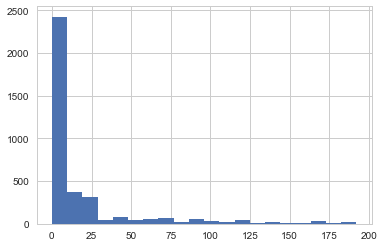

In [28]:
plt.hist(list(dict_answer_time.values()), bins = 20)
plt.show()

In [29]:
def get_time(ind):
    if ind not in dict_answer_time:
        return 'not'
    return dict_answer_time[ind]

df_threads['answer_time'] = df_threads['Index'].apply(lambda x: get_time(x))

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
df_threads_t = df_threads[df_threads['answer_time'] != 'not']
df_threads_t

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,count_threads,answer,tail,volum_message,volum_massage_norm,answer_time
42,2000-01-04 12:11:00,"(rozenset({""'vince.kaminski@enron.com'""})","(rozenset({""'candace.womack@enron.com'""})",vincent tang,"Candace, \r\n\r\nSorry for the delay. I shall...",946977060.0,2000,candace sorry delay shall edit job description...,-0.262887,42,25014,3,1,2,2565,14.842541,77.2267
73,2000-01-04 16:51:00,"(rozenset({""'donald.reinhardt@enron.com'""})","(rozenset({""'daren.farmer@enron.com'""})","c&e operating, 11/99 production",Set out below is information regarding 660 MMB...,946993860.0,2000,set information regarding mmbtu produced novem...,-0.464534,73,15916,2,1,1,940,11.859192,67.36
137,2000-01-05 13:46:00,"(rozenset({""'elizabeth.sager@enron.com'""})","(rozenset({""'gacox@gsi-net.com'""})",tennis,On?\r\n\r\nName the time (400?) and the spot (...,947069160.0,2000,name time spot met,0.000000,137,9372,2,1,1,18,3.607660,5.32667
199,2000-01-06 10:13:00,"(rozenset({""'benjamin.rogers@enron.com'""})","(rozenset({""'thz@compuserve.com'""})",email,Here is the presentation Don and I have been w...,947142780.0,2000,presentation working copy linda miller please ...,0.831775,199,9775,2,1,1,80,6.168883,5.59333
247,2000-01-06 15:58:00,"(rozenset({""'daren.farmer@enron.com'""})","(rozenset({""'ami.chokshi@enron.com'""})",request for application report list,---------------------- Forwarded by Daren J Fa...,947163480.0,2000,forwarded daren farmer hou ect robert superty ...,0.341480,247,41108,2,1,1,3379,15.742319,115.16
259,2000-01-06 17:29:00,"(rozenset({""'richard.sanders@enron.com'""})","(rozenset({""'mark.haedicke@enron.com'""})",boies potential dq,Does this name sound familiar?\r\n------------...,947168940.0,2000,name sound familiar forwarded richard sander h...,0.131998,259,30820,2,1,1,924,11.811930,16.7933
292,2000-01-07 10:18:00,"(rozenset({""'mark.haedicke@enron.com'""})","(rozenset({""'mark.taylor@enron.com'""})",energy supplement,Please give me an update so we can get this do...,947229480.0,2000,please give update get done mark forwarded mar...,1.143546,292,13983,2,1,1,453,9.951950,0.943333
321,2000-01-07 13:56:00,"(rozenset({""'tanya.tamarchenko@enron.com'""})","(rozenset({""'vince.kaminski@enron.com'""})",executive program on credit risk,"Vince,\r\nnext time this program will be offer...",947242560.0,2000,vince next time program offered october see le...,0.429568,321,48087,2,1,1,3781,16.119958,2.96
341,2000-01-07 16:25:00,"(rozenset({""'daren.farmer@enron.com'""})","(rozenset({""'aggie_chic02@hotmail.com'""})",new email,Why do you keep changing your e-mail address?\...,947251500.0,2000,keep changing mail address first day back scho...,1.993068,341,28828,3,1,2,103,6.661641,4.89333
345,2000-01-07 16:52:00,"(rozenset({""'mark.taylor@enron.com'""})","(rozenset({""'christian.yoder@enron.com'""})",grief,"January 7, 2000\r\n\r\n\r\n Writer Pa...",947253120.0,2000,january writer patrick brian dy index top stor...,0.032974,345,10297,2,1,1,2973,15.319860,65.1933


In [31]:
df_threads_t['answer_time'] = df_threads_t['answer_time'].apply(lambda x: float(x))

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


15.0077145206


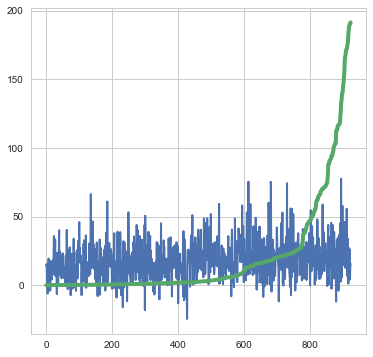

In [32]:
data_train, data_test, y_train, y_test = train_test_split(df_threads_t['clean_content'].values, 
                                                          df_threads_t['answer_time'].values, test_size=0.25)
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
X_train = vect.fit_transform(data_train)
X_test = vect.transform(data_test)

feature = vect.get_feature_names()

reg = linear_model.Ridge()
y_reg = reg.fit(X_train, y_train).predict(X_test)
coef = reg.coef_
print(metrics.median_absolute_error(y_test, y_reg))

figure(figsize=(6, 6))
df_score = pd.DataFrame()
df_score['y_test'] = y_test 
df_score['y_pred'] = y_reg
df_score = df_score.sort_values(by = 'y_test')
plt.plot(range(len(df_score)), df_score['y_pred'], '-', linewidth=2.0)
plt.plot(range(len(df_score)), df_score['y_test'], '-', linewidth=4.0)

In [33]:
df_threads_t['answer_time_norm'] =  stats.zscore(df_threads_t['answer_time'])

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


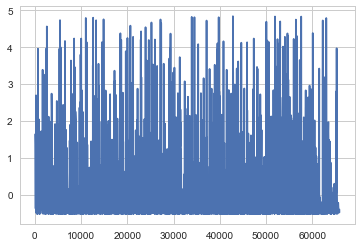

In [34]:
plt.plot(df_threads_t['answer_time_norm'])
plt.show()

0.429988157366


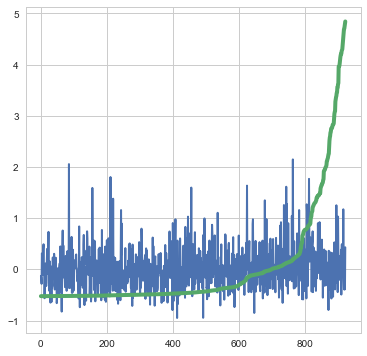

In [35]:
data_train, data_test, y_train, y_test = train_test_split(df_threads_t['clean_content'].values, 
                                                          df_threads_t['answer_time_norm'].values, test_size=0.25)
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
X_train = vect.fit_transform(data_train)
X_test = vect.transform(data_test)

feature = vect.get_feature_names()

reg = linear_model.Ridge()
y_reg = reg.fit(X_train, y_train).predict(X_test)
coef = reg.coef_
print(metrics.median_absolute_error(y_test, y_reg))

figure(figsize=(6, 6))
df_score = pd.DataFrame()
df_score['y_test'] = y_test 
df_score['y_pred'] = y_reg
df_score = df_score.sort_values(by = 'y_test')
plt.plot(range(len(df_score)), df_score['y_pred'], '-', linewidth=2.0)
plt.plot(range(len(df_score)), df_score['y_test'], '-', linewidth=4.0)

In [36]:
def get_class_time(time):
    if int(time/24)<=1:
        return 0
    if int(time/24)>1 and int(time/24)<=5:
        return 1
    if int(time/24)>5:
        return 2

In [37]:
df_threads_t['time_class'] = df_threads_t['answer_time'].apply(lambda x: get_class_time(x))

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
data_train, data_test, y_train, y_test = train_test_split(df_threads_t['clean_content'].values, 
                                                          df_threads_t['time_class'].values, test_size=0.25)
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
X_train = vect.fit_transform(data_train)
X_test = vect.transform(data_test)
feature = vect.get_feature_names()

In [56]:
clf = LogisticRegression(C = 1, penalty='l2', intercept_scaling = 0.4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(predict, y_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93       805
          1       0.00      0.00      0.00       100
          2       0.00      0.00      0.00        19

avg / total       0.76      0.87      0.81       924



C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
df_threads_t

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,count_threads,answer,tail,volum_message,volum_massage_norm,answer_time,answer_time_norm,time_class
42,2000-01-04 12:11:00,"(rozenset({""'vince.kaminski@enron.com'""})","(rozenset({""'candace.womack@enron.com'""})",vincent tang,"Candace, \r\n\r\nSorry for the delay. I shall...",946977060.0,2000,candace sorry delay shall edit job description...,-0.262887,42,25014,3,1,2,2565,14.842541,77.226667,1.635763,1
73,2000-01-04 16:51:00,"(rozenset({""'donald.reinhardt@enron.com'""})","(rozenset({""'daren.farmer@enron.com'""})","c&e operating, 11/99 production",Set out below is information regarding 660 MMB...,946993860.0,2000,set information regarding mmbtu produced novem...,-0.464534,73,15916,2,1,1,940,11.859192,67.360000,1.359934,1
137,2000-01-05 13:46:00,"(rozenset({""'elizabeth.sager@enron.com'""})","(rozenset({""'gacox@gsi-net.com'""})",tennis,On?\r\n\r\nName the time (400?) and the spot (...,947069160.0,2000,name time spot met,0.000000,137,9372,2,1,1,18,3.607660,5.326667,-0.374245,0
199,2000-01-06 10:13:00,"(rozenset({""'benjamin.rogers@enron.com'""})","(rozenset({""'thz@compuserve.com'""})",email,Here is the presentation Don and I have been w...,947142780.0,2000,presentation working copy linda miller please ...,0.831775,199,9775,2,1,1,80,6.168883,5.593333,-0.366790,0
247,2000-01-06 15:58:00,"(rozenset({""'daren.farmer@enron.com'""})","(rozenset({""'ami.chokshi@enron.com'""})",request for application report list,---------------------- Forwarded by Daren J Fa...,947163480.0,2000,forwarded daren farmer hou ect robert superty ...,0.341480,247,41108,2,1,1,3379,15.742319,115.160000,2.696212,1
259,2000-01-06 17:29:00,"(rozenset({""'richard.sanders@enron.com'""})","(rozenset({""'mark.haedicke@enron.com'""})",boies potential dq,Does this name sound familiar?\r\n------------...,947168940.0,2000,name sound familiar forwarded richard sander h...,0.131998,259,30820,2,1,1,924,11.811930,16.793333,-0.053687,0
292,2000-01-07 10:18:00,"(rozenset({""'mark.haedicke@enron.com'""})","(rozenset({""'mark.taylor@enron.com'""})",energy supplement,Please give me an update so we can get this do...,947229480.0,2000,please give update get done mark forwarded mar...,1.143546,292,13983,2,1,1,453,9.951950,0.943333,-0.496783,0
321,2000-01-07 13:56:00,"(rozenset({""'tanya.tamarchenko@enron.com'""})","(rozenset({""'vince.kaminski@enron.com'""})",executive program on credit risk,"Vince,\r\nnext time this program will be offer...",947242560.0,2000,vince next time program offered october see le...,0.429568,321,48087,2,1,1,3781,16.119958,2.960000,-0.440406,0
341,2000-01-07 16:25:00,"(rozenset({""'daren.farmer@enron.com'""})","(rozenset({""'aggie_chic02@hotmail.com'""})",new email,Why do you keep changing your e-mail address?\...,947251500.0,2000,keep changing mail address first day back scho...,1.993068,341,28828,3,1,2,103,6.661641,4.893333,-0.386359,0
345,2000-01-07 16:52:00,"(rozenset({""'mark.taylor@enron.com'""})","(rozenset({""'christian.yoder@enron.com'""})",grief,"January 7, 2000\r\n\r\n\r\n Writer Pa...",947253120.0,2000,january writer patrick brian dy index top stor...,0.032974,345,10297,2,1,1,2973,15.319860,65.193333,1.299364,1


In [66]:
def best(n, k, C):
    def get_class_time(time):
        if int(time/24)<=n:
            return 0
        if int(time/24)>n and int(time/24)<=k:
            return 1
        else:
            return 2

    df_threads_t['time_class'] = df_threads_t['answer_time'].apply(lambda x: get_class_time(x))

    y = [int(x) for x in df_threads_t['time_class'].values]
    vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
    X = vect.fit_transform(df_threads_t['clean_content'].values).toarray()


    data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
    X_train = data_train
    X_test = data_test


    model = LogisticRegression(C = C, penalty='l2', random_state=1, class_weight={0:1, 1:10, 2:10})
    y_pred = model.fit(X_train, y_train).predict(X_test)
    coef = model.coef_
    score = metrics.accuracy_score(y_test, y_pred)
        
    print('score', score, ":n=", n, "k=", k, "C=", C)
    print(classification_report(y_test, y_pred))
    print('\n')


In [68]:
n_list = [1, 2, 3, 4, 5]
k_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
C_list = arange(0.2, 3, 0.2)

for n in n_list:
    for k in k_list:
        if k <= n:
            continue
        for c in C_list:
            best(n, k, c)

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


score 0.886363636364 :n= 1 k= 2 C= 0.2

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



             precision    recall  f1-score   support

          0       0.89      1.00      0.94       819
          1       0.00      0.00      0.00        34
          2       0.00      0.00      0.00        71

avg / total       0.79      0.89      0.83       924



score 0.886363636364 :n= 1 k= 2 C= 0.4
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       819
          1       0.00      0.00      0.00        34
          2       0.00      0.00      0.00        71

avg / total       0.79      0.89      0.83       924



score 0.886363636364 :n= 1 k= 2 C= 0.6
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       819
          1       0.00      0.00      0.00        34
          2       0.00      0.00      0.00        71

avg / total       0.79      0.89      0.83       924



score 0.886363636364 :n= 1 k= 2 C= 0.8
             precision    recall  f1-score   support

          0       




score 0.886363636364 :n= 1 k= 4 C= 0.2
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       819
          1       0.00      0.00      0.00        77
          2       0.00      0.00      0.00        28

avg / total       0.79      0.89      0.83       924



score 0.886363636364 :n= 1 k= 4 C= 0.4
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       819
          1       0.00      0.00      0.00        77
          2       0.00      0.00      0.00        28

avg / total       0.79      0.89      0.83       924



score 0.886363636364 :n= 1 k= 4 C= 0.6
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       819
          1       0.00      0.00      0.00        77
          2       0.00      0.00      0.00        28

avg / total       0.79      0.89      0.83       924



score 0.886363636364 :n= 1 k= 4 C= 0.8
             precision    recal

score 0.883116883117 :n= 1 k= 5 C= 2.8
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       819
          1       0.00      0.00      0.00        84
          2       0.00      0.00      0.00        21

avg / total       0.79      0.88      0.83       924



score 0.886363636364 :n= 1 k= 6 C= 0.2
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       819
          1       0.00      0.00      0.00        91
          2       0.00      0.00      0.00        14

avg / total       0.79      0.89      0.83       924



score 0.886363636364 :n= 1 k= 6 C= 0.4
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       819
          1       0.00      0.00      0.00        91
          2       0.00      0.00      0.00        14

avg / total       0.79      0.89      0.83       924



score 0.886363636364 :n= 1 k= 6 C= 0.6
             precision    recall  

ValueError: Class label 2 not present.

In [328]:
cross_val_score(LogisticRegression(C = 1, penalty='l2', intercept_scaling = 0.5), 
                X_train, y_train, cv=3).mean()

0.86954983762759142

In [327]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94       827
          1       0.00      0.00      0.00        83
          2       0.00      0.00      0.00        16

avg / total       0.80      0.89      0.84       926



C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [329]:
clf.coef_

array([[ 0.16115858,  0.07518547,  0.05244189, ..., -0.22469651,
         0.01413122,  0.03327065],
       [-0.12897807, -0.06159625, -0.04355985, ...,  0.23952926,
        -0.01177907, -0.02585866],
       [-0.0361732 , -0.01951044, -0.01037371, ..., -0.01242977,
        -0.00399221, -0.00675198]])

In [338]:
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
X = vect.fit_transform(df_threads_t['clean_content'].values)
y = df_threads_t['time_class'].values
feature = vect.get_feature_names()
clf = LogisticRegression(C = 1, penalty='l2', intercept_scaling = 0.4)
clf.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=0.4, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [346]:
coef = clf.coef_

In [342]:
coef

array([[ 0.1917348 ,  0.07353415,  0.05212992, ...,  0.01282361,
         0.01347957, -0.01124656],
       [-0.15705738, -0.06001689, -0.04341927, ..., -0.01049306,
        -0.0113361 ,  0.02058475],
       [-0.04093745, -0.01826964, -0.00953928, ..., -0.00313893,
        -0.00354752, -0.00740109]])

In [344]:
X.shape

(3701, 19091)

In [348]:
df = pd.DataFrame()
df['featurs'] = list(feature)
df['coef0'] = list(coef[0])
df['coef1'] = list(coef[1])
df['coef2'] = list(coef[2])
df = df.sort_values(by = 'coef0', ascending=False)
df

,featurs,coef0,coef1,coef2
9278,kate,1.736442,-1.491146,-0.663975
17111,thanks,1.358793,-1.555213,-0.437455
5254,ect,1.351037,-1.306490,-0.805744
16874,tana,1.285324,-1.231050,-0.630176
9087,jones,1.020585,-0.684855,-0.771060
3457,congratulation,0.999032,-0.824042,-0.443443
18974,year,0.963708,-0.921338,-0.158278
17351,tomorrow,0.940266,-1.030194,-0.051139
16783,symes,0.923886,-0.792087,-0.370571
13094,pm,0.919633,-0.653261,-0.786394


In [355]:
df[:50]

,featurs,coef0,coef1,coef2
9278,kate,1.736442,-1.491146,-0.663975
17111,thanks,1.358793,-1.555213,-0.437455
5254,ect,1.351037,-1.306490,-0.805744
16874,tana,1.285324,-1.231050,-0.630176
9087,jones,1.020585,-0.684855,-0.771060
3457,congratulation,0.999032,-0.824042,-0.443443
18974,year,0.963708,-0.921338,-0.158278
17351,tomorrow,0.940266,-1.030194,-0.051139
16783,symes,0.923886,-0.792087,-0.370571
13094,pm,0.919633,-0.653261,-0.786394


In [356]:
df[50:100]

,featurs,coef0,coef1,coef2
2717,changed,0.512961,-0.354792,-0.310824
11839,night,0.502940,-0.519680,-0.065405
16483,structure,0.502079,-0.360988,-0.172419
13715,pv,0.501308,-0.373708,-0.136622
8174,id,0.498578,-0.571842,0.029314
16400,stop,0.494773,-0.436179,-0.126957
6262,faxed,0.494764,-0.416215,-0.139176
9371,kerri,0.491276,-0.409990,-0.208160
4481,deserved,0.487504,-0.373246,-0.301506
5687,entity,0.486721,-0.356770,-0.228775


In [351]:
df[['featurs', 'coef1']].sort_values(by = 'coef1', ascending=False)[:50]

,featurs,coef1
3856,credit,1.130108
13068,please,1.080645
2341,call,0.938482
13407,price,0.892286
16856,talk,0.885692
11245,model,0.874137
13496,professor,0.836075
3214,comment,0.793472
4888,dog,0.780440
9772,lawyer,0.777031


In [352]:
df[['featurs', 'coef1']].sort_values(by = 'coef1', ascending=False)[50:100]

,featurs,coef1
15902,smith,0.564715
2296,cabo,0.559461
6910,gareth,0.555905
5951,ewrm,0.555896
18830,worked,0.551529
14767,rob,0.545935
6037,exhibit,0.542634
4432,department,0.542611
18229,victor,0.542229
4138,dated,0.536218


In [353]:
df[['featurs', 'coef2']].sort_values(by = 'coef2', ascending=False)[:50]

,featurs,coef2
10179,london,0.883476
4110,darla,0.745691
7377,gross,0.706540
11055,midwest,0.630493
5521,ena,0.601867
5586,enfolio,0.587172
2802,chevron,0.525428
18676,wick,0.518439
15139,saucier,0.516330
6302,feel,0.513917


In [354]:
df[['featurs', 'coef2']].sort_values(by = 'coef2', ascending=False)[50:100]

,featurs,coef2
1856,bob,0.368239
11377,morse,0.367296
2165,bubbly,0.365816
3707,correct,0.364559
8660,intiatives,0.364255
13779,quentin,0.362678
14117,redelivery,0.360560
3094,cob,0.359826
8866,jana,0.358030
3086,coal,0.357870
